In [1]:
import pandas as pd


df = pd.read_csv('poker_brand.csv',sep=';')
df.head()

,Day,knew the brand before reality,knew the brand after reality no follower,knew the brand after reality follower
0,1,4,14,76
1,2,5,22,86
2,3,2,33,65
3,4,6,20,72
4,5,3,15,85


In [2]:
df.columns = ['Day', 'A', 'B', 'C']

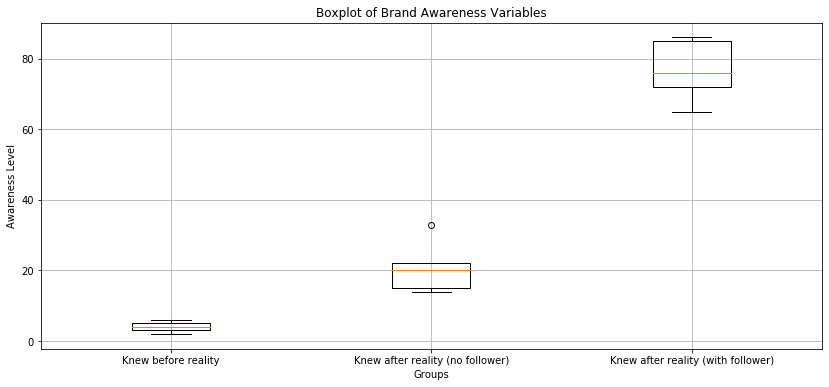

In [9]:
import matplotlib.pyplot as plt

knew_before_reality = df['A']
knew_after_no_follower = df['B']
knew_after_with_follower = df['C']

plt.figure(figsize=(14, 6))
plt.boxplot([knew_before_reality, knew_after_no_follower, knew_after_with_follower], labels=['Knew before reality', 'Knew after reality (no follower)', 'Knew after reality (with follower)'])
plt.title('Boxplot of Brand Awareness Variables')
plt.xlabel('Groups')
plt.ylabel('Awareness Level')
plt.grid(True)
plt.show()

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram_with_normal_distribution(data1, data2, data3):
    
    plt.figure(figsize=(16, 8))

    sns.distplot(data1, color='blue', label='before reality', kde=True, fit=None)
    mean_data1 = data1.mean()
    plt.axvline(x=mean_data1, color='blue', linestyle='--', label=f'before reality Mean: {mean_data1:.2f}')

    sns.distplot(data2, color='lime', label='after no follow', kde=True, fit=None)
    mean_data2 = data2.mean()
    plt.axvline(x=mean_data2, color='lime', linestyle='--', label=f'after no follow Mean: {mean_data2:.2f}')

    sns.distplot(data3, color='red', label='follow', kde=True, fit=None)
    mean_data3 = data3.mean()
    plt.axvline(x=mean_data3, color='red', linestyle='--', label=f'follow Mean: {mean_data3:.2f}')

    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title('Overlaid Histogram with Normal Distribution')
    plt.legend()
    plt.grid(True)
    plt.show()


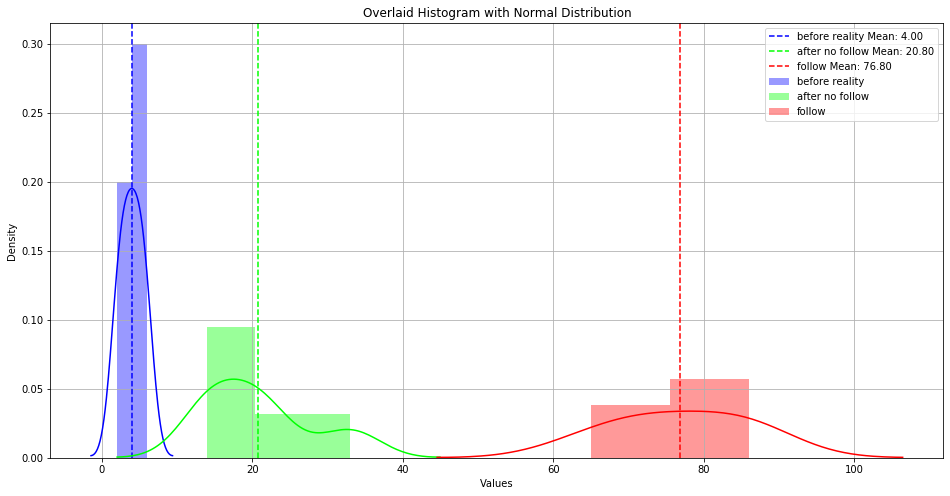

In [24]:
plot_histogram_with_normal_distribution(df['A'], df['B'], df['C'])

In [18]:
from scipy.stats import shapiro, levene

statistic1, p_value1 = shapiro(df['A'])
statistic2, p_value2 = shapiro(df['B'])
statistic3, p_value3 = shapiro(df['C'])

print("Shapiro-Wilk Test for Normality:")
print(f"Data 1: Test Statistic = {statistic1:.2f}, p-value = {p_value1:.2f}")
print(f"Data 2: Test Statistic = {statistic2:.2f}, p-value = {p_value2:.2f}")
print(f"Data 3: Test Statistic = {statistic3:.2f}, p-value = {p_value3:.2f}")

statistic, p_value = levene(df['A'], df['B'], df['C'])

print("\nLevene Test for Homogeneity of Variance:")
print(f"Test Statistic = {statistic:.2f}, p-value = {p_value:.2f}")


Shapiro-Wilk Test for Normality:
Data 1: Test Statistic = 0.99, p-value = 0.97
Data 2: Test Statistic = 0.89, p-value = 0.35
Data 3: Test Statistic = 0.93, p-value = 0.59

Levene Test for Homogeneity of Variance:
Test Statistic = 2.65, p-value = 0.11


In [20]:
from scipy.stats import f_oneway

f_statistic, p_value = f_oneway(df['A'], df['B'], df['C'])

f_statistic_rounded = round(f_statistic, 2)
p_value_rounded = round(p_value, 2)

print("ANOVA Results:")
print(f"F-Statistic = {f_statistic_rounded}, p-value = {p_value_rounded}")


ANOVA Results:
F-Statistic = 156.91, p-value = 0.0
